In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import random
seed = 666
random.seed(seed)

from inv_vae.utils.helpers import min_max_standardize, preprocess_neural_data

In [69]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE) 
plt.rc('axes', linewidth = 1.5)
plt.rc('xtick', labelsize=MEDIUM_SIZE)   
plt.rc('ytick', labelsize=MEDIUM_SIZE)   
plt.rc('legend', fontsize=MEDIUM_SIZE)   
plt.rc('figure', titlesize=MEDIUM_SIZE)

load abcd and hcp data

In [14]:
n_rois = 68
count_offset = 100
abcd_path = '../sample_data/abcd_data.npy'
hcp_path = '../sample_data/hcp_data.npy'
abcd_networks, _, _, _, abcd_trans, abcd_rotat = preprocess_neural_data(abcd_path)
hcp_networks, _, _, _, hcp_trans, hcp_rotat = preprocess_neural_data(hcp_path)
n_abcd_subjects = abcd_networks.shape[0]
n_hcp_subjects = hcp_networks.shape[0]

In [8]:
std_abcd_trans = min_max_standardize(np.log(abcd_trans))
std_abcd_rotat = min_max_standardize(np.log(abcd_rotat))
std_hcp_trans = min_max_standardize(hcp_trans)
std_hcp_rotat = min_max_standardize(hcp_rotat)

In [28]:
abcd_sub_ids = np.arange(n_abcd_subjects).reshape(-1,1)
abcd_big_trans_ids = abcd_sub_ids[std_abcd_trans > np.quantile(std_abcd_trans, .9)]
abcd_big_rotat_ids = abcd_sub_ids[std_abcd_rotat > np.quantile(std_abcd_rotat, .9)]
abcd_small_trans_ids = abcd_sub_ids[std_abcd_trans < np.quantile(std_abcd_trans, .1)]
abcd_small_rotat_ids = abcd_sub_ids[std_abcd_rotat < np.quantile(std_abcd_rotat, .1)]

abcd_big_trans_nets = abcd_networks[abcd_big_trans_ids]
abcd_small_trans_nets = abcd_networks[abcd_small_trans_ids]
abcd_diff_trans_nets = abcd_big_trans_nets.mean(0) - abcd_small_trans_nets.mean(0)

abcd_big_rotat_nets = abcd_networks[abcd_big_rotat_ids]
abcd_small_rotat_nets = abcd_networks[abcd_small_rotat_ids]
abcd_diff_rotat_nets = abcd_big_rotat_nets.mean(0) - abcd_small_rotat_nets.mean(0)

In [44]:
hcp_sub_ids = np.arange(n_hcp_subjects).reshape(-1,1)
hcp_big_trans_ids = hcp_sub_ids[std_hcp_trans > np.quantile(std_hcp_trans, .9)]
hcp_big_rotat_ids = hcp_sub_ids[std_hcp_rotat > np.quantile(std_hcp_rotat, .9)]
hcp_small_trans_ids = hcp_sub_ids[std_hcp_trans < np.quantile(std_hcp_trans, .1)]
hcp_small_rotat_ids = hcp_sub_ids[std_hcp_rotat < np.quantile(std_hcp_rotat, .1)]

hcp_big_trans_nets = hcp_networks[hcp_big_trans_ids]
hcp_small_trans_nets = hcp_networks[hcp_small_trans_ids]
hcp_diff_trans_nets = hcp_big_trans_nets.mean(0) - hcp_small_trans_nets.mean(0)

hcp_big_rotat_nets = hcp_networks[hcp_big_rotat_ids]
hcp_small_rotat_nets = hcp_networks[hcp_small_rotat_ids]
hcp_diff_rotat_nets = hcp_big_rotat_nets.mean(0) - hcp_small_rotat_nets.mean(0)

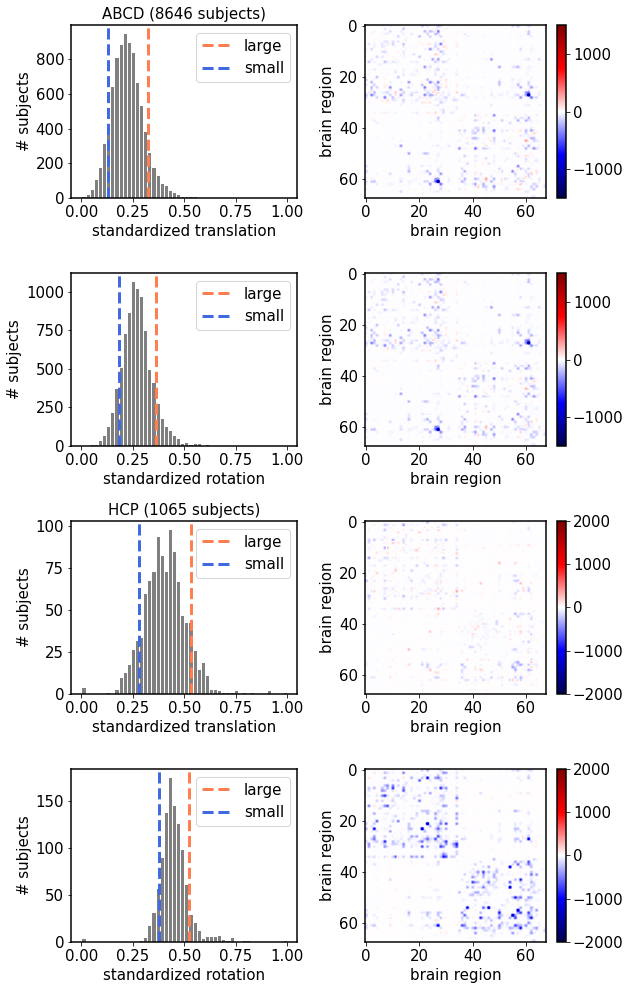

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(9, 14))
axes[0,0].hist(std_abcd_trans, 50, color='gray', edgecolor='white')
axes[0,0].axvline(x=np.quantile(std_abcd_trans, .9), color='coral', ls='dashed', lw=3, label='large')
axes[0,0].axvline(x=np.quantile(std_abcd_trans, .1), color='royalblue', ls='dashed', lw=3, label='small')
axes[0,0].set_title(f'ABCD ({n_abcd_subjects} subjects)')
axes[0,0].set_xlabel('standardized translation')
axes[0,0].set_ylabel('# subjects')
axes[1,0].hist(std_abcd_rotat, 50, color='gray', edgecolor='white')
axes[1,0].axvline(x=np.quantile(std_abcd_rotat, .9), color='coral', ls='dashed', lw=3, label='large')
axes[1,0].axvline(x=np.quantile(std_abcd_rotat, .1), color='royalblue', ls='dashed', lw=3, label='small')
axes[1,0].set_xlabel('standardized rotation')
axes[1,0].set_ylabel('# subjects')
axes[2,0].hist(std_hcp_trans, 50, color='gray', edgecolor='white')
axes[2,0].axvline(x=np.quantile(std_hcp_trans, .9), color='coral', ls='dashed', lw=3, label='large')
axes[2,0].axvline(x=np.quantile(std_hcp_trans, .1), color='royalblue', ls='dashed', lw=3, label='small')
axes[2,0].set_title(f'HCP ({n_hcp_subjects} subjects)')
axes[2,0].set_xlabel('standardized translation')
axes[2,0].set_ylabel('# subjects')
axes[3,0].hist(std_hcp_rotat, 50, color='gray', edgecolor='white')
axes[3,0].axvline(x=np.quantile(std_hcp_rotat, .9), color='coral', ls='dashed', lw=3, label='large')
axes[3,0].axvline(x=np.quantile(std_hcp_rotat, .1), color='royalblue', ls='dashed', lw=3, label='small')
axes[3,0].set_xlabel('standardized rotation')
axes[3,0].set_ylabel('# subjects')

p1=axes[0,1].imshow(abcd_diff_trans_nets.reshape(n_rois,n_rois)*count_offset, 
                    aspect='auto', cmap='seismic', vmin=-1500, vmax=1500)
p2=axes[1,1].imshow(abcd_diff_rotat_nets.reshape(n_rois,n_rois)*count_offset, 
                    aspect='auto', cmap='seismic', vmin=-1500, vmax=1500)
p3=axes[2,1].imshow(hcp_diff_trans_nets.reshape(n_rois,n_rois)*count_offset, 
                    aspect='auto', cmap='seismic', vmin=-2000, vmax=2000)
p4=axes[3,1].imshow(hcp_diff_rotat_nets.reshape(n_rois,n_rois)*count_offset, 
                    aspect='auto', cmap='seismic', vmin=-2000, vmax=2000)
cbar=plt.colorbar(p1, ax=axes[0,1])
cbar=plt.colorbar(p2, ax=axes[1,1])
cbar=plt.colorbar(p3, ax=axes[2,1])
cbar=plt.colorbar(p4, ax=axes[3,1])

for i in range(4):
    axes[i,0].legend()
    axes[i,1].set_xlabel('brain region')
    axes[i,1].set_ylabel('brain region')

plt.tight_layout()
plt.savefig('saved_figs/fig2_quantify_motion.png', dpi=500)

In [76]:
np.save('saved_data/abcd_diff_trans_nets.npy', abcd_diff_trans_nets)
np.save('saved_data/abcd_diff_rotat_nets.npy', abcd_diff_rotat_nets)
np.save('saved_data/hcp_diff_trans_nets.npy', hcp_diff_trans_nets)
np.save('saved_data/hcp_diff_rotat_nets.npy', hcp_diff_rotat_nets)

circular plots of brain connections were generated from an R package and included in a separate file.